Original Dataset Shape: (284807, 31)
Sampled Dataset Shape: (50000, 31)


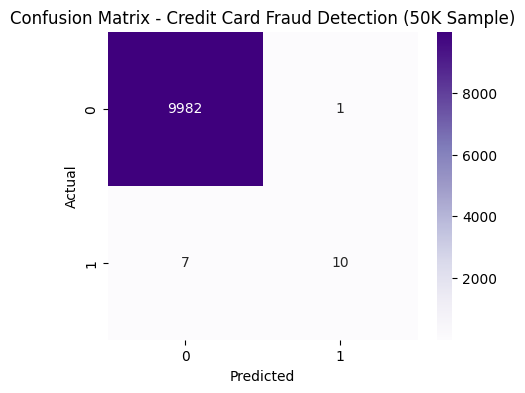


 Evaluation Metrics Summary:
Precision: 0.9091
Recall:    0.5882
F1 Score:  0.7143
ROC-AUC:   0.8843

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9983
           1       0.91      0.59      0.71        17

    accuracy                           1.00     10000
   macro avg       0.95      0.79      0.86     10000
weighted avg       1.00      1.00      1.00     10000



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
df = pd.read_csv('/content/creditcard.csv')
print("Original Dataset Shape:", df.shape)
df = df.sample(n=50000, random_state=42)
print("Sampled Dataset Shape:", df.shape)
df = df.dropna()
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Credit Card Fraud Detection (50K Sample)')
plt.show()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("\n Evaluation Metrics Summary:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))
